I've created an example analysis in this notebook for CRU v 3.22 at its native resolution (0.5x0.5 degree), analyzing the maximum temperature in the hottest month of the year (data, as well as bash scripts with CDO commands, are included). 

The analysis will be performed on CRU tmx_max data (i.e. the daytime temperature in the hottest month of the year).

In [47]:
%matplotlib inline

In [48]:
import PyQt5

import netCDF4 as nc
import numpy as np
import scipy
import os
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
# matplotlib.rcParams['legend.numpoints'] = 1

from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.lines as mlines

import matplotlib.gridspec as gridspec

# WT
import scipy.io as sio

## Load functions

In [53]:
## load function definitions

execfile('extract_T_irr.py')
execfile('calc_irr_diff.py')
execfile('calc_irr_impact_regr.py')

In [50]:
#Settings for algorithm execution

temp_product_CRU = 'tmx_max'
response = 'PC/PD'
t_res = '..' #not needed
yr_start1 = 1901
yr_end1 = 1930
yr_start2 = 1981
yr_end2 = 2010

thres_irr = 0.1 #Change in irrigated fraction

## Run the analysis

In [54]:
CRU_dT_irr, _,_,_,_ = calc_irr_impact_regr('CRU',temp_product_CRU,response,t_res,thres_irr,False,yr_start1,yr_end1,yr_start2,yr_end2)

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: Mean of empty slice


(2, 360, 720)
Done importing changes in temperature and irrigated fraction


/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice


## Plot results onto map

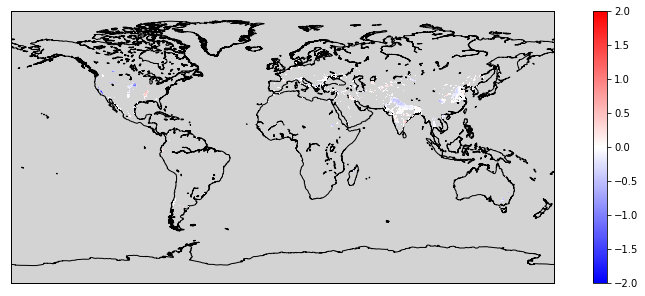

In [55]:
plt.figure(figsize=(14,5))
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='l')

m.drawmapboundary(fill_color='lightgray',zorder=1)

m.drawcoastlines()
m.imshow(CRU_dT_irr,vmin=-2,vmax=2,cmap='bwr',zorder=2)
c = plt.colorbar()
plt.show()

## Zoomed view of Australia

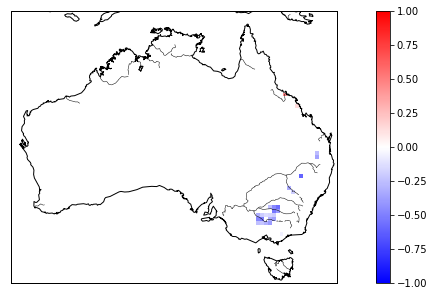

In [57]:
llcrnrlat = -44; urcrnrlat =  -9
llcrnrlon = 112; urcrnrlon = 154

#Zoom in on Australia

plt.figure(figsize=(14,5))
m = Basemap(projection='cyl',llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,resolution='l')

m.drawmapboundary(zorder=1)
m.drawrivers(zorder=3)
m.drawcoastlines(zorder=3)
m.imshow(CRU_dT_irr[2*(90+llcrnrlat):2*(90+urcrnrlat),2*(180+llcrnrlon):2*(180+urcrnrlon)],vmin=-1,vmax=1,cmap='bwr',zorder=2)
c = plt.colorbar()
plt.show()